In [1]:
import pandas as pd
from Levenshtein import ratio, distance
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel("2022(3).xlsx", sheet_name="category", 
                   usecols = ('ID счета', 'ID заявки', 'Название в заявке', 'Название в счете', 'state','ID позиции заявки','ID позиции счета'))

In [3]:
df = df[df.state == 'PAID']

In [47]:
print(df['ID счета'].nunique(),
      df['ID заявки'].nunique())#,
    #   df['ID счета'].nunique())

21224 15020


In [4]:
pairs = df[['ID счета', 'ID заявки']].drop_duplicates(subset=('ID счета', 'ID заявки'), ignore_index=True)
shet_count = df.groupby('ID счета').size().rename('shet_count')
zayavka_count = df.groupby('ID заявки').size().rename('zayavka_count')
size_comp = pairs.join(shet_count, on='ID счета', rsuffix='_shet').join(zayavka_count, on='ID заявки', rsuffix='_zayavka')
size_comp['equal_sizes'] = (size_comp.shet_count==size_comp.zayavka_count)

In [32]:
size_comp.equal_sizes.mean()

np.float64(0.5521108179419525)

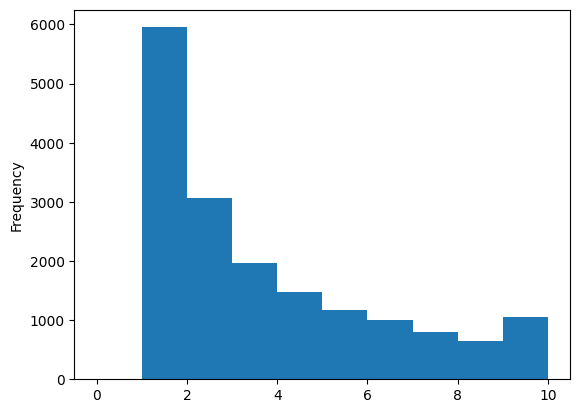

In [123]:
size_comp.zayavka_count.plot.hist(range=(0,10))
plt.show()

In [4]:
non_equal_sheta = set(size_comp[~size_comp.equal_sizes]['ID счета'].unique())
non_equal_zayavka = set(size_comp[~size_comp.equal_sizes]['ID заявки'].unique())
non_equal_data = df[df['ID счета'].isin(non_equal_sheta) & df['ID заявки'].isin(non_equal_zayavka)]

In [5]:
non_equal_data

,ID счета,state,ID заявки,ID позиции заявки,Название в заявке,ID позиции счета,Название в счете
0,260823883,PAID,12864133,12897510,Грунт-эмаль 3 в.1 по ржавчине,22254978,Грунт-эмаль З-в-1 Ferumprotect-201 Желтая ПОЛУ...
1,260823883,PAID,12864133,12897510,Грунт-эмаль 3 в.1 по ржавчине,22254977,Грунт-эмаль З-в-1 Ferumprotect-201 Желтая ПОЛУ...
2,260823946,ACCEPTED_BY_ACCEPTORS,12895635,13019010,Смесь асфальтобетонная крупнозернистая пориста...,22254979,"Пористая крупнозернистая марка 2 (гранит, БНД)..."
9,260823991,NEW,12889037,12993401,#_Тумба под умывальник,22254989,"Тумба под раковину Next 60, подвесная, 2 ящика..."
10,260823991,NEW,12889037,12993400,#_Умывальник с отверстием 2-я величина с перел...,22254990,Умывальник мебельный Next 60 см с переливом
...,...,...,...,...,...,...,...
499995,270881154,DELETED,12956077,13259865,Труба тонкостенная черная для гильз Ду133,22877828,Труба сталь электросварная прямошовная Дн 133x...
499996,270881154,DELETED,12956077,13259849,Тройник переходной латунь 25х20х25,23047637,Тройник латунь никель переходной Ду 25x20x25 (...
499997,270881154,DELETED,12956077,13259814,Нипель чугун НР Ду20,22877788,"Ниппель прямой чугун Ду 20 (3/4"") HP Fittex PLUS"
499998,270881154,DELETED,12956077,13259828,Соединитель прямой американка чугун ВР/НР в к-...,22877800,Соединитель прямой американка чугун Ду 32 (11/...


In [9]:
i = 0
for igr, gr in non_equal_data.groupby(['ID заявки']):
    i +=1
    if i >5:
        break
    if len(gr)> 5:
        print(igr)
        gr['idd'] = np.arange(len(gr))
        # print(gr.groupby(['ID счета']))
        print(gr)

(4946896,)
         ID счета    state  ID заявки  ID позиции заявки  \
205174  267556935  DELETED    4946896            2630573   
205175  267556935  DELETED    4946896            2630576   
209621  267580401      NEW    4946896            2630577   
209622  267580401      NEW    4946896            2630574   
209623  267580401      NEW    4946896            2630575   
209624  267580401      NEW    4946896            2630576   
209625  267580401      NEW    4946896            2630572   
209626  267580401      NEW    4946896            2630573   

                                        Название в заявке  ID позиции счета  \
205174  Сэндвич панели стеновые ПСП 100,  L=3,0 м._RAL...          22511679   
205175  Сэндвич панели стеновые ПСП 80,  L=3,0 м._RAL9...          22511682   
209621  Сэндвич панели стеновые ПСП 80,  L=2,73 м._RAL...          22517930   
209622  Сэндвич панели стеновые ПСП 100,  L=1,88 м._RA...          22517928   
209623  Сэндвич панели стеновые ПСП 100,  L=2,54 м._R

In [11]:
non_equal_data[non_equal_data['ID счета']==260862736]['Название в счете'].values.tolist()

['Ботинки кожаные СТИКС ПУ, металлический подносок (41)',
 'Каска защитная пластиковое оголовье Юнона (уп 10 шт) (оранжевый)',
 'Жилет мужской "Сигнальный" 80 г/м СОП 2*50мм (оранжевый, L)',
 'Ботинки кожаные СТИКС ПУ, металлический подносок (44)',
 'Жилет мужской "Сигнальный" Стандарт г/м СОП 2*50мм (оранжевый, XXL (56-58))',
 'Ботинки кожаные СТИКС ПУ, металлический подносок (42)',
 'Ботинки кожаные СТИКС ПУ, металлический подносок (43)',
 'Ботинки кожаные СТИКС ПУ, металлический подносок (45)',
 'Ботинки кожаные СТИКС ПУ, металлический подносок (40)']

In [10]:
non_equal_data[non_equal_data['ID заявки']==11168446]['Название в заявке'].values.tolist()

['Ботинки летнный (ışçı bot) 41',
 'Каска защитная  (цв оранжевый)',
 'Желет сигнальны с СОП (оранж) р. L- XL ',
 'Ботинки летнный (ışçı bot) 44',
 'Желет сигнальны с СОП (оранж) р. XXL- XXXL ',
 'Ботинки летнный (ışçı bot) 42',
 'Ботинки летнный (ışçı bot) 43',
 'Ботинки летнный (ışçı bot) 45',
 'Ботинки летнный (ışçı bot) 40',
 'Костюм летный  (ışçı elbıse) 44-46/170-176',
 'Желет сигнальны с СОП (оранж) р. L- XL ',
 'Костюм летный  (ışçı elbıse) 56-58/170-176',
 'Ботинки летнный (ışçı bot) 44',
 'Костюм летный  (ışçı elbıse) 56-58/182-188',
 'Желет сигнальны с СОП (оранж) р. XXL- XXXL ',
 'Ботинки летнный (ışçı bot) 43',
 'Ботинки летнный (ışçı bot) 45',
 'Каска защитная  (цв оранжевый)',
 'Ботинки летнный (ışçı bot) 40',
 'Костюм летный  (ışçı elbıse) 48-50/170-176',
 'Костюм летный  (ışçı elbıse) 52-54/182-188',
 'Костюм летный  (ışçı elbıse) 52-54/170-176',
 'Ботинки летнный (ışçı bot) 42',
 'Ботинки летнный (ışçı bot) 41',
 'Костюм летный  (ışçı elbıse) 48-50/180-188']

In [12]:
non_equal_data[(non_equal_data['ID счета']==260862736) &(non_equal_data['ID заявки']==11168446)][['Название в счете', 'Название в заявке']]

,Название в счете,Название в заявке
5901,"Ботинки кожаные СТИКС ПУ, металлический поднос...",Ботинки летнный (ışçı bot) 41
5902,Каска защитная пластиковое оголовье Юнона (уп ...,Каска защитная (цв оранжевый)
5903,"Жилет мужской ""Сигнальный"" 80 г/м СОП 2*50мм (...",Желет сигнальны с СОП (оранж) р. L- XL
5904,"Ботинки кожаные СТИКС ПУ, металлический поднос...",Ботинки летнный (ışçı bot) 44
5905,"Жилет мужской ""Сигнальный"" Стандарт г/м СОП 2*...",Желет сигнальны с СОП (оранж) р. XXL- XXXL
5906,"Ботинки кожаные СТИКС ПУ, металлический поднос...",Ботинки летнный (ışçı bot) 42
5907,"Ботинки кожаные СТИКС ПУ, металлический поднос...",Ботинки летнный (ışçı bot) 43
5908,"Ботинки кожаные СТИКС ПУ, металлический поднос...",Ботинки летнный (ışçı bot) 45
5909,"Ботинки кожаные СТИКС ПУ, металлический поднос...",Ботинки летнный (ışçı bot) 40


In [44]:
from Levenshtein import jaro, jaro_winkler, seqratio, setratio

def entr(p):
    # print(p.shape[0])
    en = np.log(np.clip(p, 1e-18, 2))*p + (1-p)*np.log(np.clip(1-p, 1e-18, 2))
    if p.shape[0]>1:
        en = en/np.log(p.shape[0])
    return en

def get_matr(gr, str_zayavka):  
    str2 = gr['Название в счете'].tolist()
    matr = []
    for s1 in str_zayavka:
        scores = []
        s1_comp = s1.split(' ')
        for s2 in str2:
            s2_comp = s2.split(' ')
            # rate = 1-distance(s1, s2)/len(s1)
            rate = setratio(s1_comp, s2_comp)
            # rate = ratio(s1, s2)
            if rate>1:
                print(rate)
            scores.append(rate)
        matr.append(scores)
    return  np.array(matr)

def sinkhorn(matr, T = 1, max_iter = 10):
    A = np.exp(np.array(matr)*T)
    for _ in range(max_iter):
        A = A/A.sum(axis=1).reshape(-1, 1)
        A = A/A.sum(axis=0).reshape(1, -1)
    # print(A)
    # print(A.min(), A.max())

    e_list = []
    for i in range(A.shape[1]):
        e = 0
        x = A[:, i]
        if x.max()<1:
            e = 0#entr(A).mean()
        e_list.append(e)    
    return np.argmax(A, axis=0), -np.mean(e_list)

def calc_metr(pred, true):
    # print(true==pred)
    return float((true==pred).mean())

def get_metrics(gr_zayavka, params):
    # metrics_simple, metrics_sinkhorn = [],[]
    gr_zayavka['idd'] = np.arange(len(gr_zayavka))
    str_zayavka = gr_zayavka['Название в заявке'].tolist()
    
    res = []
    for _, gr in gr_zayavka.groupby(['ID счета']):
        id_sheta = gr['ID счета'].iloc[0]
        matr = get_matr(gr, str_zayavka)

        true = gr['idd'].values
        # metrics_simple.append(calc_metr(np.argmax(matr, axis=0), true))
        # metrics_sinkhorn.append(calc_metr(sinkhorn(matr), true))
        # print(calc_metr(np.argmax(matr, axis=0), true))
        pred_simple = np.argmax(matr, axis=0)
        entr_simple = 0
        # print(matr.min(), matr.max())
        # if matr.max()<1:
        entr_simple = -entr(matr/matr.sum(axis=0).reshape(1, -1)).sum(axis=0).mean()
        pred_sinkhorn, entr_sin = sinkhorn(matr, params['T'], params['max_iter'])
        res.append({'ID счета': id_sheta,
                    'metr_simple': calc_metr(pred_simple, true),
                    'metr_sinkhorn': calc_metr(pred_sinkhorn, true),
                    'entr_simple': entr_simple,
                    'entr_sin': entr_sin})
    return  pd.DataFrame(res)
    # return pd.Series({'simple': np.mean(metrics_simple), 'sinkhorn': np.mean(metrics_sinkhorn)})

In [45]:
df_small = df[:10000].copy()
metr_res = df_small.groupby(['ID заявки']).apply(get_metrics, {'T': 7, 'max_iter': 30}).droplevel(1).reset_index()#.mean()
final_res = pd.merge(metr_res, size_comp, left_on=('ID заявки', 'ID счета'), right_on=('ID заявки', 'ID счета'))

# print(metr_res[['metr_simple', 'metr_sinkhorn']].mean())
# print(final_res[final_res.equal_sizes][['metr_simple', 'metr_sinkhorn']].mean())
# print(final_res[final_res.equal_sizes & (final_res.zayavka_count<4)][['metr_simple', 'metr_sinkhorn']].mean())
# print('______________________________________')
# print(final_res[(final_res.entr_sin<0.2) & final_res.equal_sizes].metr_sinkhorn.mean(), 
#       len(final_res[(final_res.entr_sin<0.2) & final_res.equal_sizes])/len(final_res))

# print(final_res[final_res.zayavka_count>1][['metr_simple', 'metr_sinkhorn']].mean())

C:\Users\shiko\AppData\Local\Temp\ipykernel_10308\2849411427.py:66: RuntimeWarning: invalid value encountered in divide
  entr_simple = -entr(matr/matr.sum(axis=0).reshape(1, -1)).sum(axis=0).mean()
C:\Users\shiko\AppData\Local\Temp\ipykernel_10308\2849411427.py:66: RuntimeWarning: invalid value encountered in divide
  entr_simple = -entr(matr/matr.sum(axis=0).reshape(1, -1)).sum(axis=0).mean()
C:\Users\shiko\AppData\Local\Temp\ipykernel_10308\851982339.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  metr_res = df_small.groupby(['ID заявки']).apply(get_metrics, {'T': 7, 'max_iter': 30}).droplevel(1).reset_index()#.mean()


In [46]:
final_res

,ID заявки,ID счета,metr_simple,metr_sinkhorn,entr_simple,entr_sin,shet_count,zayavka_count,equal_sizes
0,11107577,263991716,0.583333,0.666667,1.339384,-0.0,12,12,True
1,11632105,264036576,0.615385,0.846154,1.315360,-0.0,13,13,True
2,11923868,260899178,0.333333,0.333333,1.537177,-0.0,3,5,False
3,11923868,260900120,0.500000,0.000000,1.353247,-0.0,2,5,False
4,11957670,263576745,1.000000,1.000000,-0.000000,-0.0,1,1,True
...,...,...,...,...,...,...,...,...,...
2934,12907982,264042697,1.000000,1.000000,-0.000000,-0.0,1,1,True
2935,12908037,264044795,1.000000,1.000000,1.712115,-0.0,3,3,True
2936,12908039,264041096,1.000000,1.000000,-0.000000,-0.0,1,1,True
2937,12908078,264044905,1.000000,1.000000,1.915987,-0.0,2,9,False


In [58]:
d_many = final_res[final_res.zayavka_count>1]
d_filtered= d_many[final_res.entr_simple<1.2]

print(d_many.metr_simple.mean(), len(d_many))
print(d_filtered.metr_simple.mean(), len(d_filtered))

0.7174270987389618 2057
0.965450076352989 150


C:\Users\shiko\AppData\Local\Temp\ipykernel_10308\3245075413.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  d_filtered= d_many[final_res.entr_simple<1.2]


In [59]:
d_filtered

,ID заявки,ID счета,metr_simple,metr_sinkhorn,entr_simple,entr_sin,shet_count,zayavka_count,equal_sizes
6,11996714,264044113,0.145455,0.145455,1.165733,-0.0,55,55,True
12,12239241,263488492,1.000000,1.000000,-0.000000,-0.0,1,3,False
13,12245448,263451121,1.000000,1.000000,-0.000000,-0.0,1,3,False
29,12496114,263554423,1.000000,1.000000,1.108392,-0.0,2,2,True
43,12590571,264025339,1.000000,1.000000,-0.000000,-0.0,1,45,False
...,...,...,...,...,...,...,...,...,...
2785,12905536,263981564,1.000000,1.000000,-0.000000,-0.0,1,2,False
2788,12905609,263982794,1.000000,1.000000,-0.000000,-0.0,1,3,False
2800,12905805,264000363,1.000000,1.000000,-0.000000,-0.0,1,4,False
2830,12906163,263982685,1.000000,1.000000,-0.000000,-0.0,1,5,False


In [40]:
final_res[final_res.zayavka_count>1][['metr_simple', 'metr_sinkhorn']].mean()

metr_simple      0.536708
metr_sinkhorn    0.537352
dtype: float64

In [103]:
print(final_res[(final_res.entr_sin<0.05) & final_res.equal_sizes].metr_sinkhorn.mean(), 
      len(final_res[(final_res.entr_sin<0.05) & final_res.equal_sizes])/len(final_res))

0.9999753086419753 0.30622660768969034


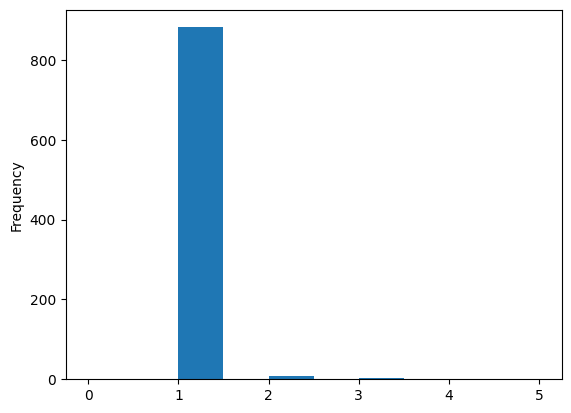

In [118]:
final_res[(final_res.entr_sin<0.05) & final_res.equal_sizes].shet_count.plot.hist(range=(0,5))
plt.show()

In [111]:
np.historgram(final_res[(final_res.entr_sin<0.05) & final_res.equal_sizes].shet_count)

AttributeError: module 'numpy' has no attribute 'historgram'

In [41]:
len(final_res[(final_res.entr_sin<0.2) & final_res.equal_sizes])

101

In [99]:
np.histogram(final_res['entr_sin'])

(array([1032,   63,  160,  171,  210,  259,  180,  208,  184,  472]),
 array([0.        , 0.06931472, 0.13862944, 0.20794415, 0.27725887,
        0.34657359, 0.41588831, 0.48520303, 0.55451774, 0.62383246,
        0.69314718]))

In [ ]:
metr_simple      0.846081
metr_sinkhorn    0.835299
dtype: float64
metr_simple      0.875876
metr_sinkhorn    0.889988
dtype: float64
metr_simple      0.918919
metr_sinkhorn    0.932995
dtype: float64

In [41]:
matr = []
for s1 in str1:
    scores = []
    for s2 in str2:
        scores.append(ratio(s1, s2))
    matr.append(scores)
    ind = np.argmax(scores)
    print(s1, '  |   ', str2[ind], scores[ind]) 

Перчатки с двойным латексным покрытием   |    ПЕРЧАТКИ х/б двойной облив 0.34375
Налобный фонарь  ЯРКИЙ ЛУЧ LH-180 ACCU   |    ФОНАРЬ налобный, светодиодный, аккумуляторный 0.3132530120481928
Кабель ПВС 2*1.5 ВМЕСТО КАБЕЛЯ приобрести 	
Вилку каучуковую=25шт   |    ВИЛКА 2P+E 1*16A каучук IP44 0.25806451612903225
Маска сварщика хамелеон ,РАЗМЕР СВЕТОФИЛЬТРА: 120 х 70 мм   |    СТЕКЛО покровное 121*69 мм 0.24096385542168675
Краги для сварщика (красные)   |    КРАГИ спилковые 0.32558139534883723
Стекло защитное прозрачное, РАЗМЕР: 120 х 70 мм   |    СТЕКЛО покровное 121*69 мм 0.3835616438356164


In [26]:
for i, s1 in enumerate(str1):
    print(s1, '  |   ', str2[i])

Перчатки с двойным латексным покрытием   |    ПЕРЧАТКИ х/б двойной облив
Налобный фонарь  ЯРКИЙ ЛУЧ LH-180 ACCU   |    ФОНАРЬ налобный, светодиодный, аккумуляторный
Кабель ПВС 2*1.5 ВМЕСТО КАБЕЛЯ приобрести 	
Вилку каучуковую=25шт   |    ВИЛКА 2P+E 1*16A каучук IP44
Маска сварщика хамелеон ,РАЗМЕР СВЕТОФИЛЬТРА: 120 х 70 мм   |    МАСКА СВАРЩИКА FUBAG OPTIMA Visor Silver (4-8/9-13 DIN)
Краги для сварщика (красные)   |    КРАГИ спилковые
Стекло защитное прозрачное, РАЗМЕР: 120 х 70 мм   |    СТЕКЛО покровное 121*69 мм


In [69]:
T = 100
A = np.exp(np.array(matr)*T)
w = A/A.sum(axis=1).reshape(-1, 1)

ind_list = np.argmax(w, axis=0)
for i, s1 in enumerate(str1):
    ind = ind_list[i]
    print(s1, '  |   ', str2[ind], '  |   ', i==ind) 

Перчатки с двойным латексным покрытием   |    ПЕРЧАТКИ х/б двойной облив   |    True
Налобный фонарь  ЯРКИЙ ЛУЧ LH-180 ACCU   |    ФОНАРЬ налобный, светодиодный, аккумуляторный   |    True
Кабель ПВС 2*1.5 ВМЕСТО КАБЕЛЯ приобрести 	
Вилку каучуковую=25шт   |    ВИЛКА 2P+E 1*16A каучук IP44   |    True
Маска сварщика хамелеон ,РАЗМЕР СВЕТОФИЛЬТРА: 120 х 70 мм   |    МАСКА СВАРЩИКА FUBAG OPTIMA Visor Silver (4-8/9-13 DIN)   |    True
Краги для сварщика (красные)   |    КРАГИ спилковые   |    True
Стекло защитное прозрачное, РАЗМЕР: 120 х 70 мм   |    СТЕКЛО покровное 121*69 мм   |    True


In [ ]:
import ot
a = [.5, .5]
b = [.5, .5]
M = [[0., 1.], [1., 0.]]
ot.sinkhorn(a, b, M, 1)
array([[ 0.36552929,  0.13447071],
    [ 0.13447071,  0.36552929]])

In [1]:
pip install -U sentence-transformers


     ---------------------------------------- 0.0/43.7 kB ? eta -:--:--
     --------- ------------------------------ 10.2/43.7 kB ? eta -:--:--
     ----------------- -------------------- 20.5/43.7 kB 640.0 kB/s eta 0:00:01
     -------------------------------------- 43.7/43.7 kB 428.4 kB/s eta 0:00:00
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB 1.5 MB/s eta 0:00:00
  Using cached networkx-3.3-py3-none-any.whl.metadata (5.1 kB)
     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     ---------------------------------------- 41.5/41.5 kB 2.0 MB/s eta 0:00:00
  Using cached tokenizers-0.19.1-cp311-none-win_amd64.whl.metadata (6.9 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/227.1 kB ? eta -:--:--
   ------- -------------------------------- 41.0/227.1 kB ? eta -:--:--
   ------------------- -------------------- 11

In [ ]:
def extract_invoice_data(txt, acc_numers, inn_numbers):
    system_prompt = f"""
You are a data extraction tool that extracts invoice data from Russian-language PDF files. You need to extract attribute values from the description of building products.

"Труба стальная электросварная прямошовная оцинкованная Ø89 x 3.5мм ГОСТ 10704-91"

1. In the invoice, you need to allocate the 'account number' of the buyer and the seller. In the document, the word 'account' will be given in Russian and can be abbreviated, for example, "расч.сч." or "р/с" or "Р/Сч", etc.
2. There are the following candidates for 'account number' in the text: {acc_numers}. Check if any of them belong to the buyer or seller. Ignore the account numbers that belong to the bank.
3. There are the following candidates for 'taxpayer number' in the text: {inn_numbers}. Check if any of them belong to the buyer or seller. Ignore the taxpayer numbers that belong to the bank.
4. The buyer can be named in different ways in the documents, for example, "покупатель", "грузополучатель", "плательщик" or "получатель", etc. The seller can also be named in different ways, for example, "продавец", or "поставщик", etc.
5. Please extract the 'account number' and 'taxpayer number' of buyer and seller in this invoice and then output into JSON, keeping the values in the original language.
6. If a row is blank denote missing fields with "null" values.    
7. Don't interpolate or make up data.
    """
    # print(system_prompt)  
    response = client.chat.completions.create(
        model="gpt-4o",
        response_format={ "type": "json_object" },
        messages=[
            {
                "role": "system",
                "content": system_prompt
            },
            {
                "role": "user",
                "content": f"Here is the text of the invoice: \n{txt}"
            }
        ],
        temperature=0.0,
    )
    return response.choices[0].message.content